In [1]:
#import library
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import quandl
from pathlib import Path
%matplotlib inline

### Whale Portfolio

In [2]:
#create path
whale_csv = pd.read_csv("Resources/whale_return.csv")
whale_data = pd.read_csv("Resources/whale_return.csv", infer_datetime_format=True, parse_dates=True, index_col='Date')
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
#count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
#drop nulls
whale_data = whale_data.dropna()

In [5]:
#check if nulls are gone
whale_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


### Algo Portfolio

In [6]:
algo_csv = pd.read_csv("Resources/algo_returns.csv")
algo_data= pd.read_csv("Resources/algo_returns.csv", infer_datetime_format=True, parse_dates=True, index_col='Date')
algo_data

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
#count null data
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
#drop nul data
algo_data = algo_data.dropna()

In [9]:
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


### SP500 History

In [10]:
sp500_csv = pd.read_csv("Resources/sp500_history.csv")
sp500_data = pd.read_csv("Resources/sp500_history.csv", infer_datetime_format=True, parse_dates=True, index_col='Date')
sp500_data = sp500_data.sort_index()
sp500_data.head()

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"


In [11]:
#check data type
sp500_data.dtypes

Close    object
dtype: object

In [12]:
#fix data type
sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")
sp500_data["Close"] = sp500_data["Close"].str.replace(",", "")
sp500_data["Close"] = sp500_data["Close"].astype('float')

<ipython-input-12-d7f87d27ce19>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")


In [13]:
sp500_data.dtypes

Close    float64
dtype: object

In [14]:
#calculate the daily returns
sp500_data = sp500_data.pct_change()
sp500_data.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
#drop the nulls 
sp500_data = sp500_data.dropna()
sp500_data.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
#change the 'Close' column
columns = ['SP500 Close']
sp500_data.columns = columns
sp500_data.head()

,SP500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


### Combine all portfolios

In [17]:
all_portfolios = pd.concat([whale_data, algo_data, sp500_data], axis = 'columns', join = 'inner')
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


### Performance Analysis 

<AxesSubplot:xlabel='Date'>

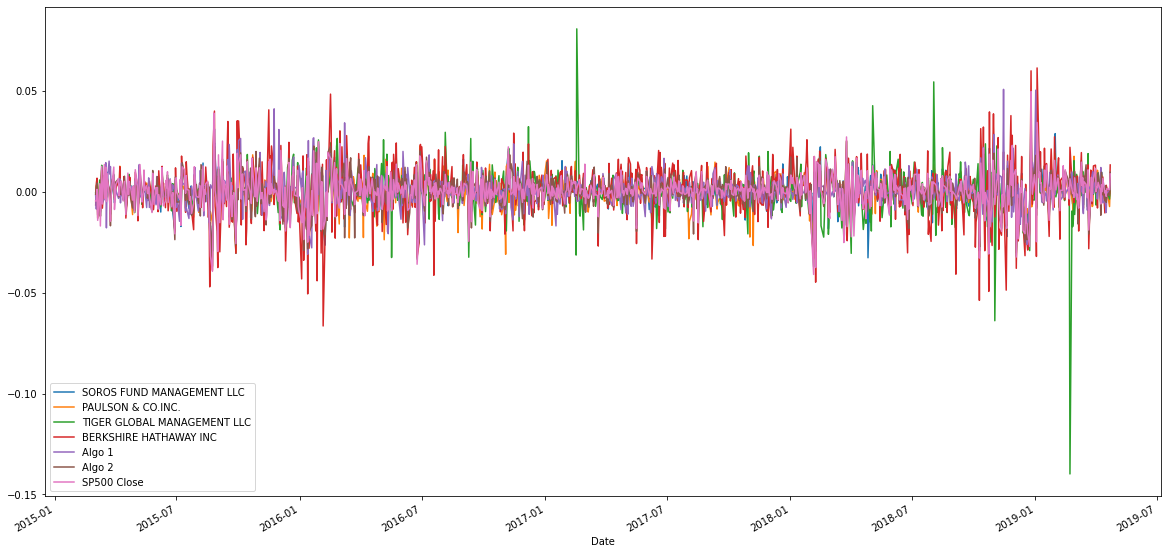

In [18]:
#plot daily performance on all portfolios
all_portfolios.plot(figsize = (20, 10))

In [19]:
#algo_data.plot(figsize = (20,10))

In [20]:
#sp500_data.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

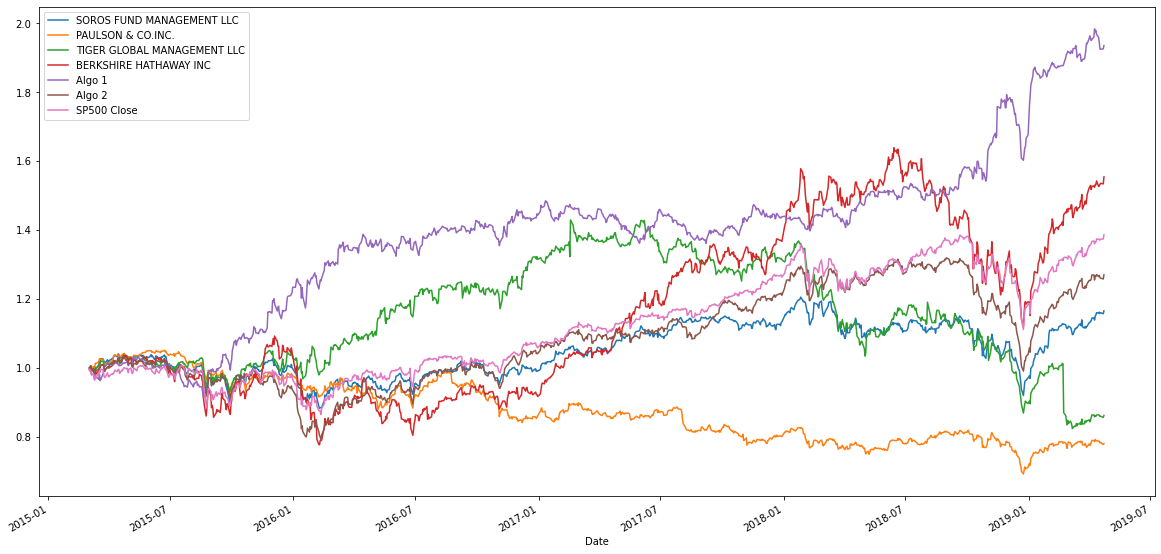

In [21]:
#cumulative returns
cumulative_returns_whale = (1 + all_portfolios).cumprod()
cumulative_returns_whale.plot(figsize = (20,10))

In [22]:
#cumulative_returns_algo = (1 + algo_data).cumprod()

In [23]:
#cumulative_returns_algo.plot(figsize = (20,10))

In [24]:
#cumulative_returns_sp500 = (1 + sp500_data).cumprod()
#cumulative_returns_sp500.plot(figsize=(20,10))

### Risk Analysis

<AxesSubplot:xlabel='Date'>

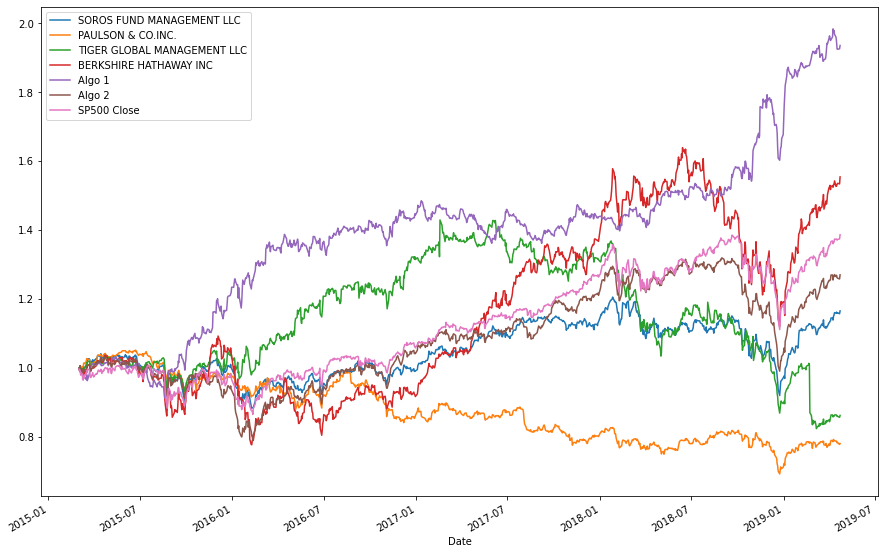

In [25]:
cumulative_returns_all = (1 + all_portfolios).cumprod()
cumulative_returns_all.plot(figsize = (15,10))

<AxesSubplot:>

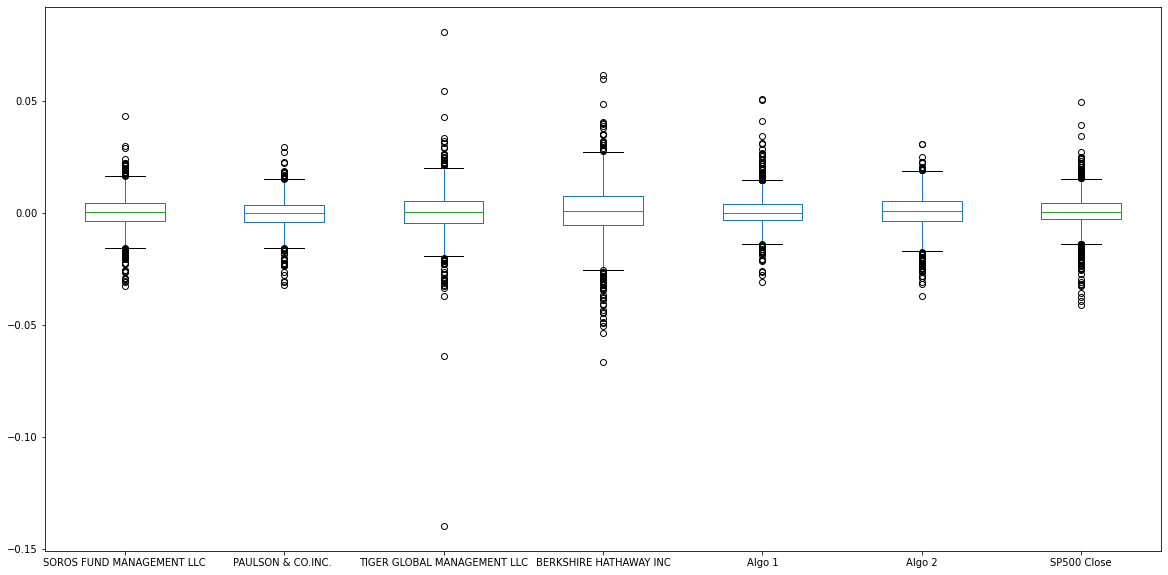

In [26]:
all_portfolios.plot.box(figsize = (20,10))

In [27]:
#visualize the box plot for each portfolio 
#whale_data.plot.box()

In [28]:
#algo_data.plot.box()

In [29]:
#sp500_data.plot.box()

In [30]:
#calculate std of each portfolio
daily_std_whale = all_portfolios.std()
daily_std_whale

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Close                    0.008554
dtype: float64

In [31]:
all_portfolios.std() > all_portfolios['SP500 Close'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500 Close                    False
dtype: bool

based on the std of each portfolio, the less risky investments compared to the SP500 are: Paulson & Co, Algo 1, Soros Fund Management LLC, and Algo 2, in that order. 
The reason being that they all have smaller std that the SP500 which makes them less volatile. The remaining portfolios are more risky than the SP500

In [32]:
#calculate the annualized std
annualized_std = all_portfolios.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Close                    0.135786
dtype: float64

### Rolling Statistics

<AxesSubplot:xlabel='Date'>

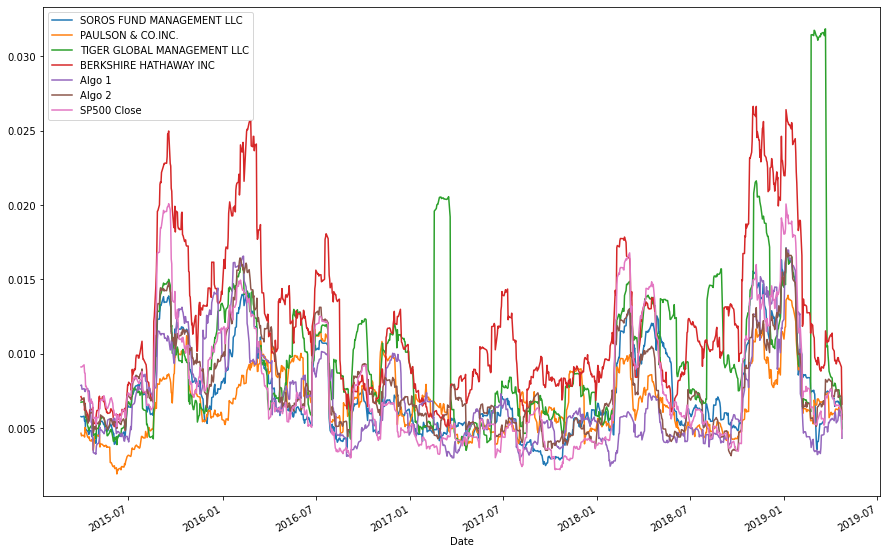

In [33]:
all_portfolios.rolling(window = 21).std().plot(figsize = (15,10))

In [34]:
#calculate the correlation
all_portfolios.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

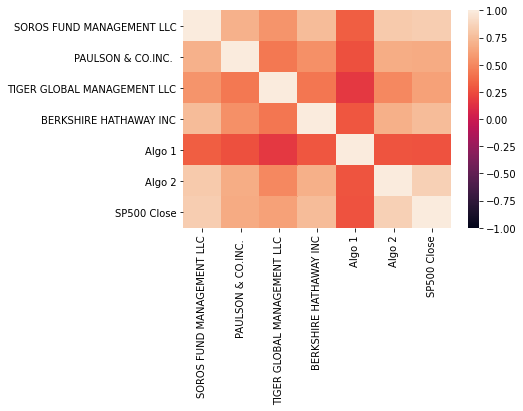

In [35]:
#create a heatmap for the correlation
sns.heatmap(all_portfolios.corr(), vmin=-1, vmax=1)

### Calculate and Plot Beta 

In [36]:
#calculate the daily return of a single portfolio to calculate the covariance 
daily_returns_algo = algo_data['Algo 1'].pct_change()
daily_returns_algo

Date
2014-06-05         NaN
2014-06-06   -0.542965
2014-06-09   -3.699287
2014-06-10   -1.879164
2014-06-11    0.080354
                ...   
2019-04-25   -0.376856
2019-04-26    3.368192
2019-04-29    0.746957
2019-04-30   -1.565269
2019-05-01   -1.031829
Name: Algo 1, Length: 1235, dtype: float64

In [37]:
#calculate the covariance of the algo portfolio
covariance_algo = daily_returns_algo.cov(all_portfolios['SP500 Close'])
covariance_algo

0.00012600435148292017

In [38]:
#calculate the variance of the SP500
variance_SP500 = all_portfolios['SP500 Close'].var()
variance_SP500

7.316632424648712e-05

In [39]:
#calculate the Beta
beta_algo = covariance_algo / variance_SP500
beta_algo

1.7221632052804665

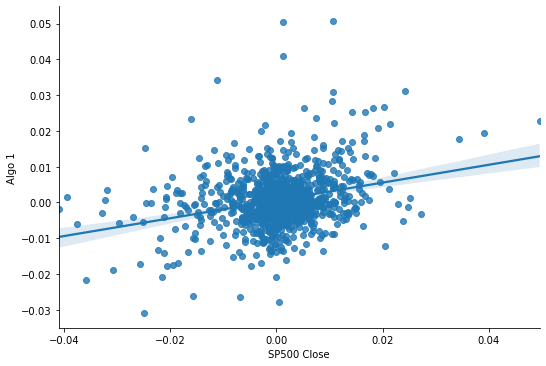

In [40]:
#Plot the Beta
sns.lmplot(x='SP500 Close',y='Algo 1', data = all_portfolios, aspect = 1.5, fit_reg = True)

In [41]:
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


### Sharpe Ratio 

In [42]:
#create a path for the risk free rate
#display risk free rate
risk_free_rate = pd.read_csv('C:/Users/javie/OneDrive/Desktop/NorthWestern/Whale-off-the-Portfolio/Resources/risk_free_rate.csv', index_col = 'Date', infer_datetime_format=True, parse_dates=True)
risk_free_rate.head()

,rf_rate
Date,
1954-01-04,0.000148
1954-01-05,0.000142
1954-01-06,0.000142
1954-01-07,0.000146
1954-01-08,0.000146


In [43]:
risk_free_rate.dtypes

rf_rate    float64
dtype: object

In [44]:
#combine portfolio to the risk free rate
all_portfolios_rf_rate = pd.concat([all_portfolios, risk_free_rate], axis = 'columns', join = 'inner')
all_portfolios_rf_rate.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,rf_rate
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.000002
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.000001
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.000002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.000001
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.000002


In [45]:
all_portfolio_rf_sharpe = ((all_portfolios_rf_rate.mean()-all_portfolios_rf_rate['rf_rate'].mean()) * 252) / (all_portfolios_rf_rate.std() * np.sqrt(252))
all_portfolio_rf_sharpe.sort_values(ascending = False)

Algo 1                         1.147533
BERKSHIRE HATHAWAY INC         0.521262
SP500 Close                    0.492223
Algo 2                         0.314131
SOROS FUND MANAGEMENT LLC      0.203630
rf_rate                        0.000000
TIGER GLOBAL MANAGEMENT LLC   -0.280736
PAULSON & CO.INC.             -0.703095
dtype: float64

<AxesSubplot:>

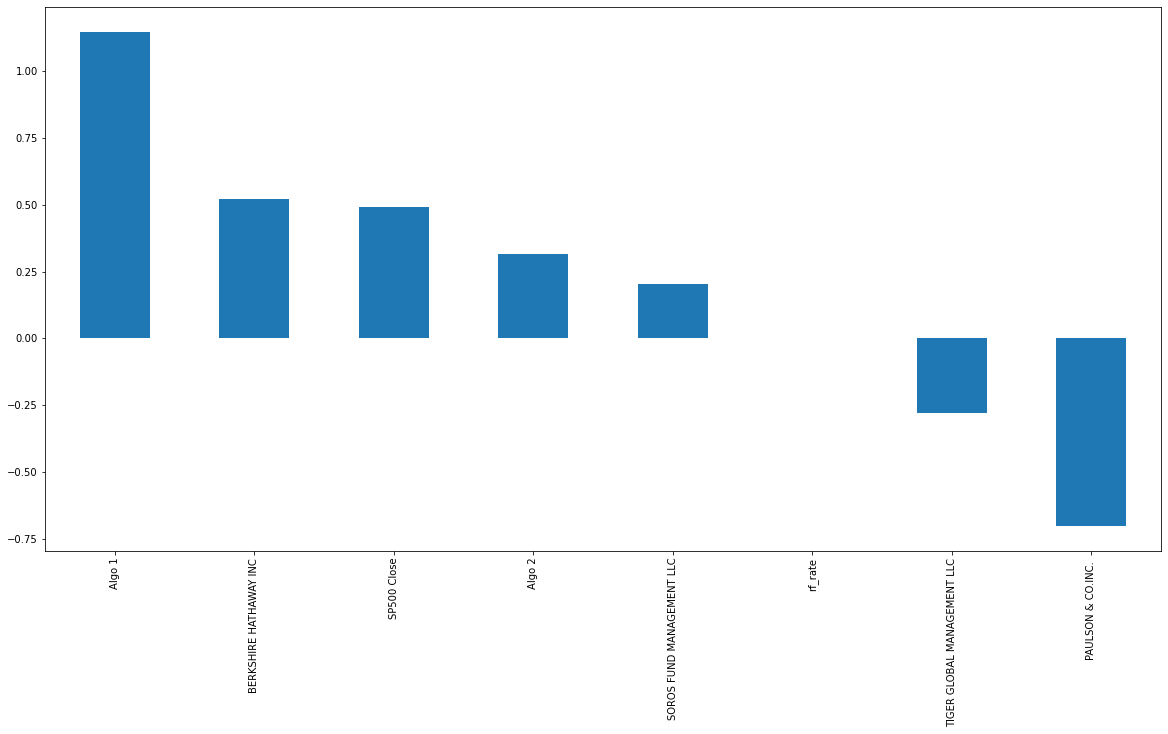

In [46]:
#plot on a bar graph
all_portfolio_rf_sharpe.sort_values(ascending = False).plot(kind = 'bar', figsize = (20,10))

### Custom Portfolio


In [47]:
#find out what path you are in
Path.cwd()

WindowsPath('C:/Users/javie/OneDrive/Desktop/NorthWestern/Whale-off-the-Portfolio')

In [48]:
#read in the files
nke_df = pd.read_csv('C:/Users/javie/OneDrive/Desktop/NorthWestern/Whale-off-the-Portfolio//Resources/NKE.csv', index_col = 'Date', infer_datetime_format=True, parse_dates=True)
mcd_df = pd.read_csv('C:/Users/javie/OneDrive/Desktop/NorthWestern/Whale-off-the-Portfolio/Resources/MCD.csv', index_col = 'Date', infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv('C:/Users/javie/OneDrive/Desktop/NorthWestern/Whale-off-the-Portfolio/Resources/SBUX.csv', index_col = 'Date', infer_datetime_format=True, parse_dates=True)
sbux_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-05-21,12.270000,12.755000,12.195000,12.645000,10.525883,25733200
2010-05-24,12.580000,12.720000,12.455000,12.535000,10.434315,17079600
2010-05-25,12.220000,12.495000,12.035000,12.460000,10.371883,23753800
2010-05-26,12.395000,12.675000,12.340000,12.355000,10.284484,24204800
2010-05-27,12.730000,13.020000,12.650000,13.010000,10.829714,20103600
...,...,...,...,...,...,...
2021-05-14,111.010002,111.589996,110.250000,111.199997,111.199997,6835300
2021-05-17,111.220001,111.269997,109.830002,110.980003,110.980003,4521200
2021-05-18,111.370003,112.209999,111.010002,111.070000,111.070000,5177300


In [49]:
#combine all the portfolios by the columns
combined_custom_portfolio = pd.concat([nke_df,mcd_df,sbux_df], axis = 'columns', join = 'inner')
combined_custom_portfolio.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,
2010-05-21,17.285000,17.945000,17.035000,17.847500,15.593434,17064000,67.070000,68.040001,65.550003,67.860001,49.256496,12614800,12.270,12.755,12.195,12.645,10.525883,25733200
2010-05-24,17.792500,17.977501,17.677500,17.834999,15.582513,22684400,67.839996,68.510002,67.260002,67.660004,49.111332,6733300,12.580,12.720,12.455,12.535,10.434315,17079600
2010-05-25,17.522499,18.250000,17.317499,18.227501,15.925442,21164000,66.589996,67.839996,66.199997,67.839996,49.241985,9257900,12.220,12.495,12.035,12.460,10.371883,23753800
2010-05-26,18.379999,18.405001,17.980000,18.129999,15.840254,16727200,67.889999,68.059998,66.000000,66.010002,47.913662,11525200,12.395,12.675,12.340,12.355,10.284484,24204800
2010-05-27,18.320000,18.490000,18.190001,18.475000,16.141684,14743600,66.410004,67.199997,66.019997,67.199997,49.187263,9728000,12.730,13.020,12.650,13.010,10.829714,20103600


In [50]:
#drop all columns except for the adjusted close
combined_custom_portfolio = combined_custom_portfolio.drop(columns = ['Open','High','Low','Close'])
combined_custom_portfolio.head()

,Adj Close,Volume,Adj Close,Volume,Adj Close,Volume
Date,,,,,,
2010-05-21,15.593434,17064000,49.256496,12614800,10.525883,25733200
2010-05-24,15.582513,22684400,49.111332,6733300,10.434315,17079600
2010-05-25,15.925442,21164000,49.241985,9257900,10.371883,23753800
2010-05-26,15.840254,16727200,47.913662,11525200,10.284484,24204800
2010-05-27,16.141684,14743600,49.187263,9728000,10.829714,20103600


In [51]:
#show all the columns
combined_custom_portfolio

,Adj Close,Volume,Adj Close,Volume,Adj Close,Volume
Date,,,,,,
2010-05-21,15.593434,17064000,49.256496,12614800,10.525883,25733200
2010-05-24,15.582513,22684400,49.111332,6733300,10.434315,17079600
2010-05-25,15.925442,21164000,49.241985,9257900,10.371883,23753800
2010-05-26,15.840254,16727200,47.913662,11525200,10.284484,24204800
2010-05-27,16.141684,14743600,49.187263,9728000,10.829714,20103600
...,...,...,...,...,...,...
2021-05-14,135.929993,4367200,231.720001,1942500,111.199997,6835300
2021-05-17,136.410004,3934200,231.679993,1630900,110.980003,4521200
2021-05-18,135.559998,5664700,231.929993,2913000,111.070000,5177300


In [52]:
#drop the volume column
combined_custom_portfolio = combined_custom_portfolio.drop(columns = ['Volume'])
combined_custom_portfolio.head()

,Adj Close,Adj Close,Adj Close
Date,,,
2010-05-21,15.593434,49.256496,10.525883
2010-05-24,15.582513,49.111332,10.434315
2010-05-25,15.925442,49.241985,10.371883
2010-05-26,15.840254,47.913662,10.284484
2010-05-27,16.141684,49.187263,10.829714


In [53]:
#display columns side by side
columns = ['NKE Adj Close', 'MCD Adj Close', 'SBUX Adj Close']
combined_custom_portfolio.columns = columns
combined_custom_portfolio.head()

,NKE Adj Close,MCD Adj Close,SBUX Adj Close
Date,,,
2010-05-21,15.593434,49.256496,10.525883
2010-05-24,15.582513,49.111332,10.434315
2010-05-25,15.925442,49.241985,10.371883
2010-05-26,15.840254,47.913662,10.284484
2010-05-27,16.141684,49.187263,10.829714


In [54]:
#count the nulls
combined_custom_portfolio.isnull().sum()

NKE Adj Close     0
MCD Adj Close     0
SBUX Adj Close    0
dtype: int64

In [55]:
#calculate the daily returns for the portfolios
daily_returns_custom  = combined_custom_portfolio.pct_change()
daily_returns_custom.head()

,NKE Adj Close,MCD Adj Close,SBUX Adj Close
Date,,,
2010-05-21,NaN,NaN,NaN
2010-05-24,-0.000700,-0.002947,-0.008699
2010-05-25,0.022007,0.002660,-0.005983
2010-05-26,-0.005349,-0.026975,-0.008427
2010-05-27,0.019029,0.026581,0.053015


In [56]:
#drop the nulls and display the data
daily_returns_custom = daily_returns_custom.dropna()
daily_returns_custom.head()

,NKE Adj Close,MCD Adj Close,SBUX Adj Close
Date,,,
2010-05-24,-0.000700,-0.002947,-0.008699
2010-05-25,0.022007,0.002660,-0.005983
2010-05-26,-0.005349,-0.026975,-0.008427
2010-05-27,0.019029,0.026581,0.053015
2010-05-28,-0.020568,-0.004911,-0.004996


In [57]:
#set weights
weights = [1/3, 1/3, 1/3]

In [58]:
#calculate portfolio return
custom_returns = daily_returns_custom.dot(weights)
custom_returns = custom_returns.to_frame()

In [59]:
#display sample data
custom_returns

,0
Date,
2010-05-24,-0.004116
2010-05-25,0.006228
2010-05-26,-0.013584
2010-05-27,0.032875
2010-05-28,-0.010158
...,...
2021-05-14,0.010759
2021-05-17,0.000460
2021-05-18,-0.001447


In [60]:
#rename the 0 column
custom_returns.rename(columns = {0: "custom_portfolio"}, inplace = True)

In [61]:
#display sample data
custom_returns

,custom_portfolio
Date,
2010-05-24,-0.004116
2010-05-25,0.006228
2010-05-26,-0.013584
2010-05-27,0.032875
2010-05-28,-0.010158
...,...
2021-05-14,0.010759
2021-05-17,0.000460
2021-05-18,-0.001447


In [62]:
all_portfolios_returns = pd.concat([all_portfolios,custom_returns], axis = 'columns', join = 'inner')
all_portfolios_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,custom_portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.004313
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.003160
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.001464
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016927
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.006743
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.001450
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000820
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.011678


In [63]:
#calculate the daily returns
all_portfolios_daily_returns = all_portfolios_returns.pct_change()
all_portfolios_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,custom_portfolio
Date,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762069,-1.650792,4.113650,-1.641381,3.422374,-3.544765,-0.033072,-0.267284
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.272547,-1.463369
2015-03-06,-2.968464,-1.876837,-4.601872,-2.947282,4.190046,-3.650914,-12.850368,-12.559107
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-1.278290,-1.398364
...,...,...,...,...,...,...,...,...
2019-04-16,-2.898341,-1.335693,-3.088323,-1.079744,0.603391,-1.634218,-1.809253,1.479763
2019-04-17,-2.073108,-17.661086,4.306534,2.851035,0.483294,-2.803170,-5.463942,-0.434118
2019-04-18,-1.499843,-1.188925,-1.131886,-0.405345,-0.942926,-0.764890,-1.694469,13.234219


In [64]:
all_portfolios_daily_returns.dropna(inplace=True)
all_portfolios_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,custom_portfolio
Date,,,,,,,,
2015-03-04,-2.762069,-1.650792,4.113650,-1.641381,3.422374,-3.544765,-0.033072,-0.267284
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.272547,-1.463369
2015-03-06,-2.968464,-1.876837,-4.601872,-2.947282,4.190046,-3.650914,-12.850368,-12.559107
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-1.278290,-1.398364
2015-03-10,-18.625484,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,-5.300052,-2.642148


In [65]:
#calculate the annualized std
all_portfolios_annualized_returns = all_portfolios_daily_returns * np.sqrt(252)
all_portfolios_annualized_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,custom_portfolio
Date,,,,,,,,
2015-03-04,-43.846493,-26.205504,65.302162,-26.056113,54.328510,-56.271398,-0.525009,-4.243001
2015-03-05,12.714973,4.088388,-30.625637,9.470068,-14.109313,12.528650,-20.201064,-23.230255
2015-03-06,-47.122912,-29.793863,-73.052452,-46.786651,66.514917,-57.956460,-203.993266,-199.369636
2015-03-09,-17.043767,-34.642182,-26.810561,-13.871776,1.570265,-17.679692,-20.292219,-22.198340
2015-03-10,-295.670397,-35.939156,-48.693144,77.684637,-11.818952,-163.938634,-84.135719,-41.942792


<AxesSubplot:xlabel='Date'>

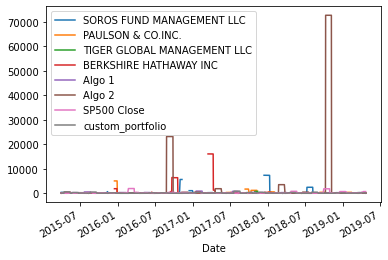

In [66]:
#calculate the rolling 21 day window
all_portfolios_annualized_returns = all_portfolios_annualized_returns.rolling(window=21).std()
all_portfolios_annualized_returns.plot()

In [67]:
#calculate the correlation
all_portfolios_annualized_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,custom_portfolio
SOROS FUND MANAGEMENT LLC,1.000000,-0.046402,-0.106151,-0.030219,-0.133813,-0.055366,-0.084976,0.007777
PAULSON & CO.INC.,-0.046402,1.000000,0.147620,0.008827,-0.070131,-0.057889,-0.076233,-0.037871
TIGER GLOBAL MANAGEMENT LLC,-0.106151,0.147620,1.000000,-0.105333,0.158283,-0.041424,-0.053515,0.103539
BERKSHIRE HATHAWAY INC,-0.030219,0.008827,-0.105333,1.000000,-0.116055,-0.024988,-0.078359,-0.123342
Algo 1,-0.133813,-0.070131,0.158283,-0.116055,1.000000,-0.073741,-0.131868,0.266952
Algo 2,-0.055366,-0.057889,-0.041424,-0.024988,-0.073741,1.000000,0.397652,-0.096384
SP500 Close,-0.084976,-0.076233,-0.053515,-0.078359,-0.131868,0.397652,1.000000,-0.091973
custom_portfolio,0.007777,-0.037871,0.103539,-0.123342,0.266952,-0.096384,-0.091973,1.000000


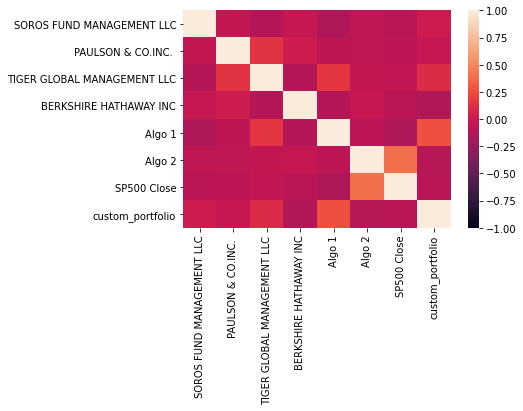

In [68]:
sns.heatmap(all_portfolios_annualized_returns.corr(), vmin=-1, vmax=1);

In [69]:
#calculate the Beta
covariance_all_portfolio = all_portfolios_annualized_returns['custom_portfolio'].rolling(window=60).cov(all_portfolios_annualized_returns['SP500 Close'])

In [70]:
variance_all_portfolio = all_portfolios_annualized_returns['SP500 Close'].rolling(window=60).var()

In [71]:
beta_all_portfolio = covariance_all_portfolio/variance_all_portfolio
beta_all_portfolio

Date
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
                ...   
2019-04-16    0.212787
2019-04-17    0.230356
2019-04-18    0.223287
2019-04-22    0.217606
2019-04-23    0.213160
Length: 1029, dtype: float64

In [72]:
beta_all_portfolio = beta_all_portfolio.dropna()
beta_all_portfolio

Date
2015-06-26   -0.049773
2015-06-29   -0.670693
2015-06-30   -0.984488
2015-07-01   -1.082107
2015-07-02   -1.199210
                ...   
2019-04-16    0.212787
2019-04-17    0.230356
2019-04-18    0.223287
2019-04-22    0.217606
2019-04-23    0.213160
Length: 870, dtype: float64

<AxesSubplot:xlabel='Date'>

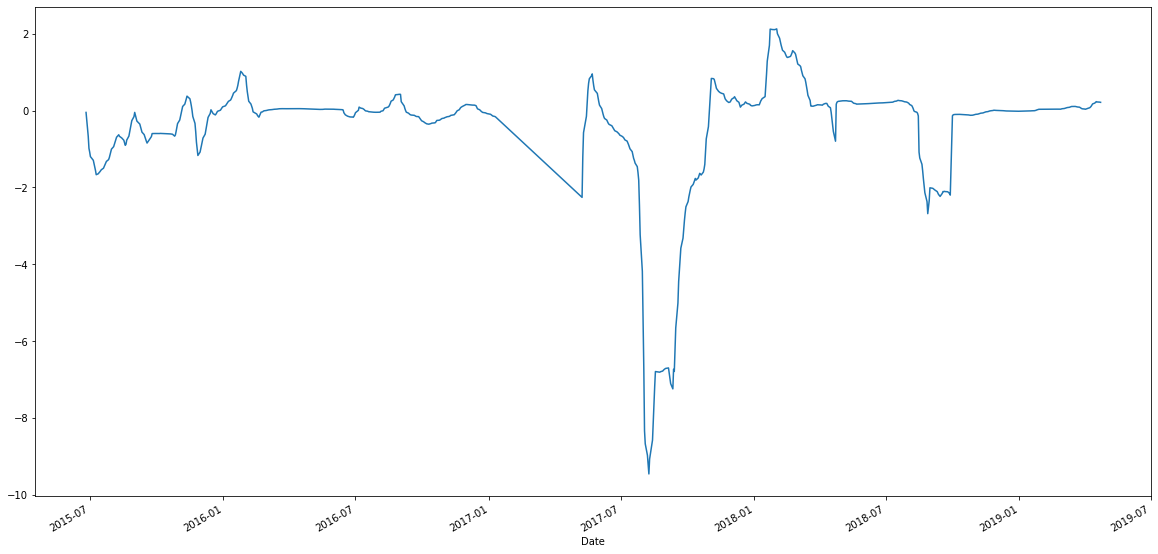

In [73]:
beta_all_portfolio.plot(figsize = (20,10))

## Calculate and Visualize the Sharpe Ratio

In [74]:
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,custom_portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.004313
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.003160
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.001464
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016927
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.006743


In [75]:
#add the risk free rate to your custom portfolio
all_portfolios_returns_rf = pd.concat([all_portfolios_returns, risk_free_rate], axis = 'columns', join = 'inner')
all_portfolios_returns_rf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,custom_portfolio,rf_rate
Date,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.004313,0.000002
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.003160,0.000001
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.001464,0.000002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016927,0.000001
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.006743,0.000002


In [76]:
#show the sharpe ratio of the portfolios
custom_portfolio_rf_sharpe = ((all_portfolios_returns_rf.mean()-all_portfolios_returns_rf['rf_rate'].mean()) * 252) / (all_portfolios_returns_rf.std() * np.sqrt(252))
custom_portfolio_rf_sharpe.sort_values(ascending = False)

Algo 1                         1.147533
custom_portfolio               0.975808
BERKSHIRE HATHAWAY INC         0.521262
SP500 Close                    0.492223
Algo 2                         0.314131
SOROS FUND MANAGEMENT LLC      0.203630
rf_rate                        0.000000
TIGER GLOBAL MANAGEMENT LLC   -0.280736
PAULSON & CO.INC.             -0.703095
dtype: float64

<AxesSubplot:>

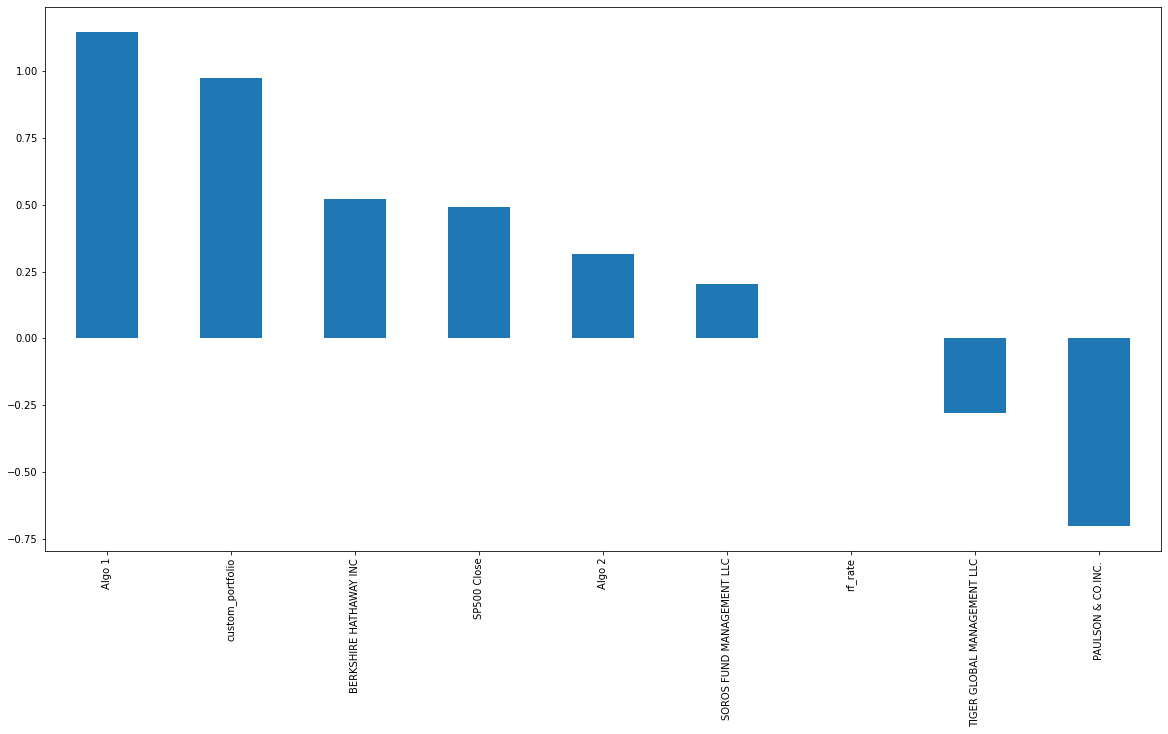

In [77]:
#plot the sharpe ratio
custom_portfolio_rf_sharpe.sort_values(ascending = False).plot(kind='bar', figsize=(20,10))

In [80]:
all_portfolios_returns.mean().sort_values(ascending=False)

custom_portfolio               0.000708
Algo 1                         0.000662
BERKSHIRE HATHAWAY INC         0.000506
SP500 Close                    0.000349
Algo 2                         0.000263
SOROS FUND MANAGEMENT LLC      0.000177
TIGER GLOBAL MANAGEMENT LLC   -0.000083
PAULSON & CO.INC.             -0.000214
dtype: float64

In [81]:
all_portfolios_returns.std().sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
custom_portfolio               0.009866
SP500 Close                    0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

## How does your portfolio do